In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt


2023-11-29 09:35:20.839405: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-29 09:35:20.871352: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-29 09:35:20.871386: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-29 09:35:20.872423: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-29 09:35:20.878067: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-29 09:35:20.878960: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
# Load dataset
dset = tf.keras.datasets.mnist

# Segragiting Traing and Testing Data from the dataset
(X_train, y_train), (X_test, y_test) = dset.load_data()

# Normalize data
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [3]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# ReLu to introduce non-linearity
# Softmax to convert raw output to probability for each of the 10 classes

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Adam is the algo

In [18]:
# Training the model with progress figures
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# running the model on the same dataset for 10 times


Epoch 1/10
 103/1875 [>.............................] - ETA: 2s - loss: 0.0043 - accuracy: 0.9985  

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0067 - accuracy: 0.9979 - val_loss: 0.1715 - val_accuracy: 0.9731
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0079 - accuracy: 0.9975 - val_loss: 0.1752 - val_accuracy: 0.9753
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0059 - accuracy: 0.9982 - val_loss: 0.1798 - val_accuracy: 0.9739
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0063 - accuracy: 0.9980 - val_loss: 0.1853 - val_accuracy: 0.9753
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0060 - accuracy: 0.9980 - val_loss: 0.1828 - val_accuracy: 0.9747
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0071 - accuracy: 0.9977 - val_loss: 0.1675 - val_accuracy: 0.9761
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0041 - accuracy: 0.9986 - val_loss: 0.1757 - val_accuracy: 0.9767
Epo

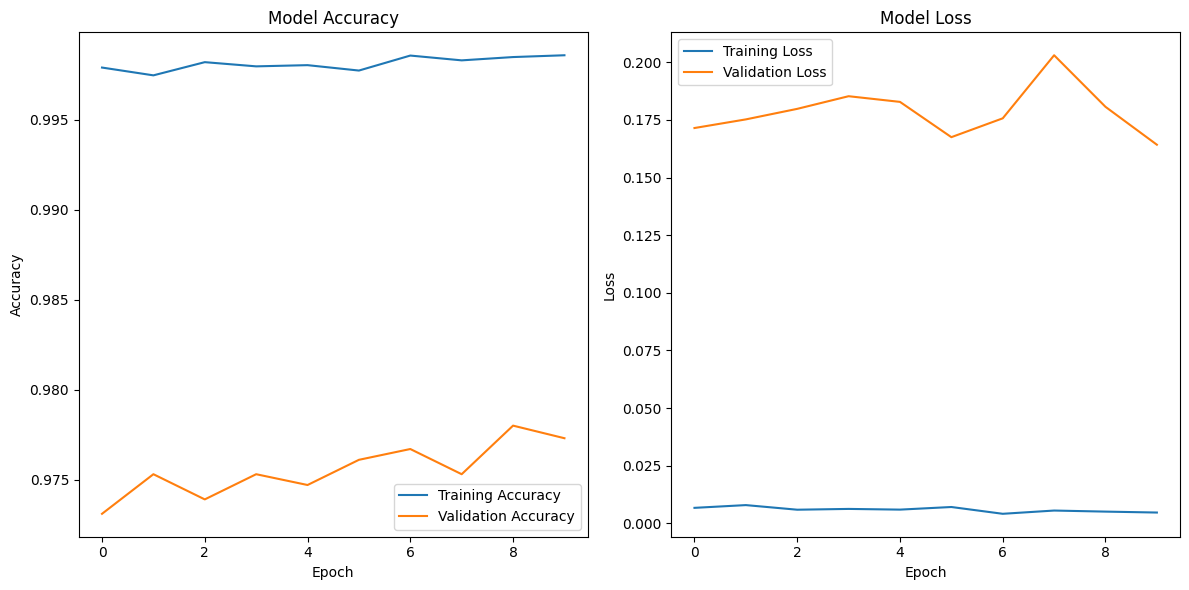

In [24]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [20]:
# Evaluate the model
loss_per, acc_per = model.evaluate(X_test, y_test)
print(f"Loss Percentage: {loss_per * 100}")
print(f"Accuracy Percentage: {acc_per * 100}")


313/313 [==============================] - 0s 919us/step - loss: 0.1642 - accuracy: 0.9773
Loss Percentage: 16.423632204532623
Accuracy Percentage: 97.72999882698059


In [22]:
# Saving the model
model.save('sheep_one.model')

INFO:tensorflow:Assets written to: sheep_one.model/assets


INFO:tensorflow:Assets written to: sheep_one.model/assets
